## Introduction to NLP (Natural Language Processing) - Maja Wasielewska, Jakub Kubacki, Zofia Łągiewka
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

In [10]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [11]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [13]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)
df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [14]:
df

,Tweet,Sentiment
0,"@dennislami @Dicle_Aygur, yeah exactly :)",1
1,@brenttiscool capcom cock teasing us. I need t...,0
2,@Ktens Usually just a high stool with three ki...,1
3,@VyenAngel gosh its cheaper in malaysia :( her...,0
4,"The sun may not be shining here, but at least ...",1
...,...,...
9995,@x123456789tine @5SOS_FAHUpdates gotta love ti...,1
9996,"@Thaque883 nothing much, he just needs to grow...",1
9997,"What is it with this country, first sign of a ...",1
9998,@rvirenee_ gua cans dong :(,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [15]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [16]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
813,@CorstianBoerman it ain't bad :),1
9397,"Showed up to open shop, but my co-worker is MI...",0
9783,"@mRpOrTeR7 ""This Corner"" is so fucking Dope!! ...",1
8853,Why am I not tierd :(,0
1261,@CraftaBelle I very jokingly said it with no s...,0
...,...,...
6376,@The_RHS There's some stunning show gardens @ ...,1
7794,"A great end to the work week! Sunshine, low hu...",1
6281,Valentine et al found r'ships btwn homo/biphob...,0
9693,@xjisoobelle no money :(,0


In [17]:
test

,Tweet,Sentiment
2349,@serhatahmet You are very welcome. I hope you ...,1
8897,💅🏽💋 - :)))) haven't seen you in years,1
301,@Tim_A_Roberts @Pinter_Quotes works for me :),1
8177,Just pre-ordered Pixar's Inside Out steelbook!...,1
1957,why am I even awake :(,0
...,...,...
2840,"@WizKhallista it's about the egg, water and bl...",0
63,If you didn't get inspired by the sheer fact t...,1
9324,@WoollyWormhead It's on my to do list if I'm s...,1
8085,@buterasfredo i can't wait for the movie to co...,0


Positive words


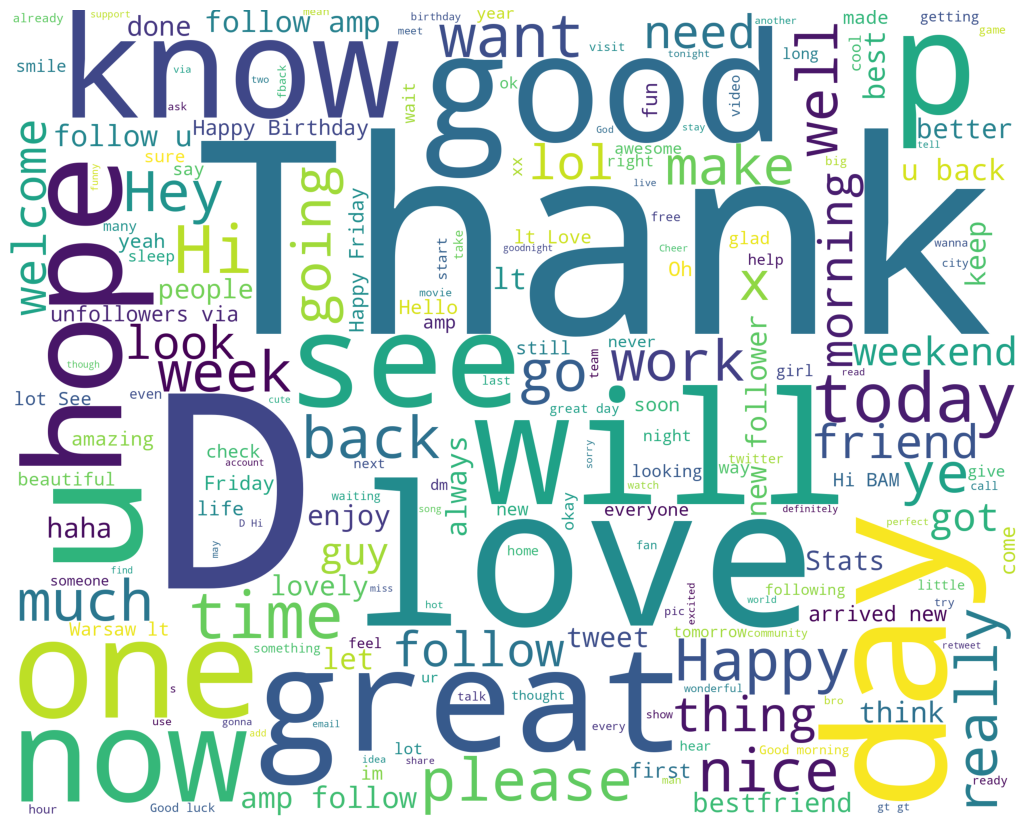

Negative words


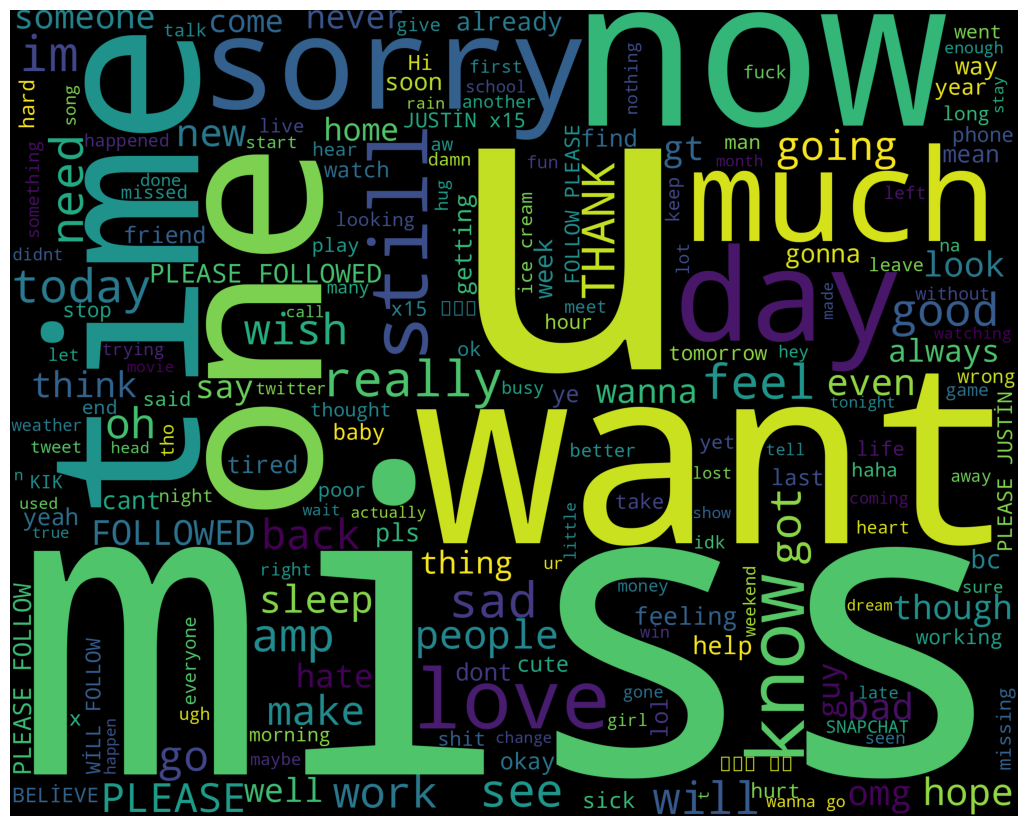

In [18]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [21]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [22]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

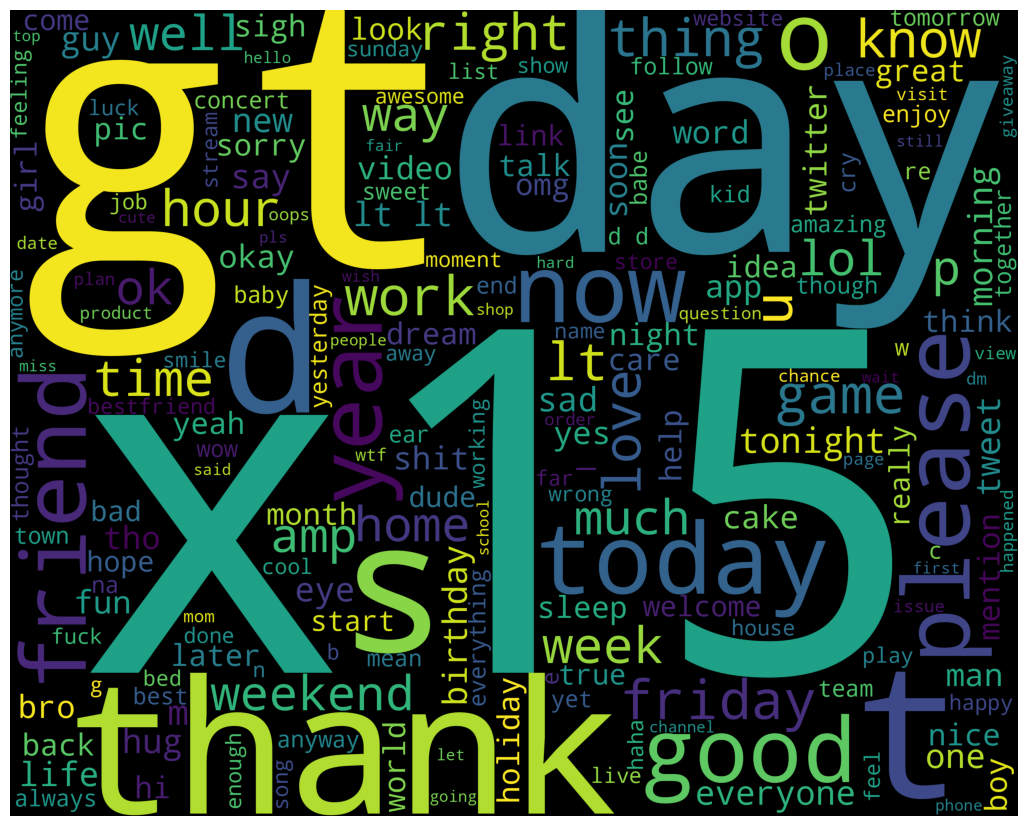

In [23]:
wordcloud_draw(w_features)

In [24]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [25]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 497/439 
[Positive]: 503/342 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [28]:
# Load positive and negative tweets
all_positive_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')
all_negative_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')

# Combine positive and negative tweets
all_tweets = all_positive_tweets + all_negative_tweets

# Create labels: 1 for positive tweets, 0 for negative tweets
labels = [1] * len(all_positive_tweets) + [0] * len(all_negative_tweets)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(all_tweets, labels, test_size=0.2, random_state=42)

# Initialize CountVectorizer to convert tweets to sparse matrix (bag-of-words model)
# We'll use stopwords from NLTK to remove common English words
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# Fit and transform the training data into a sparse matrix
X_train_sparse = vectorizer.fit_transform(X_train)

# Transform the test data into a sparse matrix (using the same vocabulary learned from training data)
X_test_sparse = vectorizer.transform(X_test)

# Initialize a sparse-optimized Logistic Regression classifier (liblinear solver is suitable for small datasets)
classifier = LogisticRegression(solver='liblinear')

# Train the classifier on the sparse training data
classifier.fit(X_train_sparse, y_train)

# Predict the sentiment of the test data
y_pred = classifier.predict(X_test_sparse)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Accuracy: 75.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       988
           1       0.78      0.71      0.74      1012

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000



In [29]:
# Initialize CountVectorizer to convert tweets to sparse matrix (bag-of-words + bigrams model)
# We'll use stopwords from NLTK to remove common English words
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))

# Fit and transform the training data into a sparse matrix
X_train_sparse = vectorizer.fit_transform(X_train)

# Transform the test data into a sparse matrix (using the same vocabulary learned from training data)
X_test_sparse = vectorizer.transform(X_test)

# Initialize a sparse-optimized Logistic Regression classifier (liblinear solver is suitable for small datasets)
classifier = LogisticRegression(solver='liblinear')

# Train the classifier on the sparse training data
classifier.fit(X_train_sparse, y_train)

# Predict the sentiment of the test data
y_pred = classifier.predict(X_test_sparse)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Accuracy: 75.95%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       988
           1       0.80      0.71      0.75      1012

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [30]:
from sklearn.svm import LinearSVC
# Initialize CountVectorizer to convert tweets to sparse matrix (bag-of-words + bigrams model)
# We'll use stopwords from NLTK to remove common English words
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))

# Fit and transform the training data into a sparse matrix
X_train_sparse = vectorizer.fit_transform(X_train)

# Transform the test data into a sparse matrix (using the same vocabulary learned from training data)
X_test_sparse = vectorizer.transform(X_test)

# Initialize a sparse-optimized Logistic Regression classifier (liblinear solver is suitable for small datasets)
classifier = LinearSVC()

# Train the classifier on the sparse training data
classifier.fit(X_train_sparse, y_train)

# Predict the sentiment of the test data
y_pred = classifier.predict(X_test_sparse)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Accuracy: 75.65%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       988
           1       0.79      0.70      0.74      1012

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [31]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
# Combine positive and negative tweets
all_tweets = all_positive_tweets + all_negative_tweets

# Create labels: 1 for positive tweets, 0 for negative tweets
labels = [1] * len(all_positive_tweets) + [0] * len(all_negative_tweets)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(all_tweets, labels, test_size=0.2, random_state=42)

# Initialize CountVectorizer to convert tweets to sparse matrix (unigrams and bigrams)
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))

# Fit and transform the training data into a sparse matrix of unigrams and bigrams
X_train_sparse = vectorizer.fit_transform(X_train)

# Transform the test data into a sparse matrix (using the same vocabulary learned from training data)
X_test_sparse = vectorizer.transform(X_test)

# Function to compute and return evaluation metrics
def compute_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return pd.Series([accuracy, precision, recall, f1], index=['Accuracy', 'Precision', 'Recall', 'F1'], name=model_name)

# Initialize a dictionary to store all results
results = {}

# Model 1: Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_sparse, y_train)
y_pred_nb = nb_classifier.predict(X_test_sparse)
results['Naive Bayes'] = compute_metrics(y_test, y_pred_nb, 'Naive Bayes')

# Model 2: Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_sparse, y_train)
y_pred_rf = rf_classifier.predict(X_test_sparse)
results['Random Forest'] = compute_metrics(y_test, y_pred_rf, 'Random Forest')

# Model 3: SVM
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_sparse, y_train)
y_pred_svm = svm_classifier.predict(X_test_sparse)
results['SVM'] = compute_metrics(y_test, y_pred_svm, 'SVM')

# Model 4: Logistic Regression
lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier.fit(X_train_sparse, y_train)
y_pred_lr = lr_classifier.predict(X_test_sparse)
results['Logistic Regression'] = compute_metrics(y_test, y_pred_lr, 'Logistic Regression')

# Model 5: VADER
sid = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(texts):
    predictions = []
    for text in texts:
        score = sid.polarity_scores(text)
        if score['compound'] >= 0:  # Positive or neutral sentiment
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

y_pred_vader = vader_sentiment_analysis(X_test)
results['VADER'] = compute_metrics(y_test, y_pred_vader, 'VADER')

# Combine all results into one DataFrame
metrics_df = pd.DataFrame(results)

# Display the result table
print(metrics_df)

           Naive Bayes  Random Forest       SVM  Logistic Regression     VADER
Accuracy      0.763000       0.731500  0.756500             0.759500  0.837000
Precision     0.781971       0.786490  0.793953             0.795328  0.772222
Recall        0.737154       0.644269  0.700593             0.706522  0.961462
F1            0.758901       0.708311  0.744357             0.748299  0.856514


In [40]:
# Vader - the best one - F1 is the highest score
# we used unigrams and bigrams and a sparse matrix implementation so that it runs in several seconds, not hours.
# adding trigrams didn't improve anything.